# Challenge 2 - TELECOMX - LATAM

##Extraccion

In [1]:
import pandas as pd

file = "/content/datos_tratados.csv"
df = pd.read_csv(file)

print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (7267, 22)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


### Eliminar Columna Irrelevante

In [2]:
cols_to_drop = [col for col in df.columns if "id" in col.lower()]
df = df.drop(columns=cols_to_drop, errors="ignore")

print("✅ Dimensiones después de eliminar IDs:", df.shape)
print("📌 Columnas actuales:", df.columns.tolist())

df.head()

✅ Dimensiones después de eliminar IDs: (7267, 21)
📌 Columnas actuales: ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


### Encoding


In [3]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("📌 Columnas categóricas detectadas:", cat_cols)

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("✅ Dimensiones después del One-Hot Encoding:", df_encoded.shape)
df_encoded.head()

📌 Columnas categóricas detectadas: ['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod', 'account.Charges.Total']
✅ Dimensiones después del One-Hot Encoding: (7267, 6561)


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,Cuentas_Diarias,customer.gender_Male,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,0.0,0,1,1,9,1,1,65.6,2.186667,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0,0,0,9,1,0,59.9,1.996667,True,...,False,False,False,False,False,False,False,False,False,False
2,1.0,0,0,0,4,1,1,73.9,2.463333,True,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1,1,0,13,1,1,98.0,3.266667,True,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1,1,0,3,1,1,83.9,2.796667,False,...,False,False,False,False,False,False,False,False,False,False


### Proporcion de Cancelacion (Churn)

📌 Conteo de clientes por clase:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

📊 Proporción de clientes por clase (%):
Churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


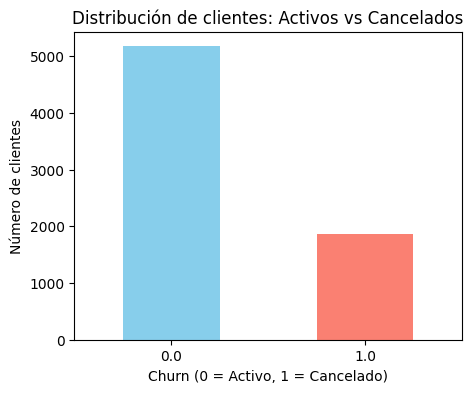

In [4]:

import matplotlib.pyplot as plt

counts = df['Churn'].value_counts(normalize=False)
proporciones = df['Churn'].value_counts(normalize=True) * 100

print("📌 Conteo de clientes por clase:")
print(counts)

print("\n📊 Proporción de clientes por clase (%):")
print(proporciones.round(2))


plt.figure(figsize=(5,4))
counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de clientes: Activos vs Cancelados")
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()

### Balanceo de Clases

In [7]:
!pip install -q imbalanced-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


y = pd.to_numeric(df_encoded['Churn'], errors='coerce')
X = df_encoded.drop(columns=['Churn']).apply(pd.to_numeric, errors='coerce')


mask = y.notna()
X = X.loc[mask].copy()
y = y.loc[mask].astype(int)

print("✅ y sin NaN:", y.isna().sum() == 0)
print("Distribución original:\n", y.value_counts())


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)


k_neighbors = max(1, min(5, y_train.value_counts().min() - 1))

print(f"\nUsando SMOTE con k_neighbors={k_neighbors}")


smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imp, y_train)
print("\n📌 Después de SMOTE:\n", y_train_smote.value_counts())


under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train_imp, y_train)
print("\n📌 Después de undersampling:\n", y_train_under.value_counts())


smoteenn = SMOTEENN(random_state=42, smote=SMOTE(random_state=42, k_neighbors=k_neighbors))
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_imp, y_train)
print("\n📌 Después de SMOTE+ENN:\n", y_train_smoteenn.value_counts())


cols = X_train.columns
X_train_smote_df    = pd.DataFrame(X_train_smote,    columns=cols)
X_train_under_df    = pd.DataFrame(X_train_under,    columns=cols)
X_train_smoteenn_df = pd.DataFrame(X_train_smoteenn, columns=cols)


✅ y sin NaN: True
Distribución original:
 Churn
0    5174
1    1869
Name: count, dtype: int64

Usando SMOTE con k_neighbors=5

📌 Después de SMOTE:
 Churn
0    3880
1    3880
Name: count, dtype: int64

📌 Después de undersampling:
 Churn
0    1402
1    1402
Name: count, dtype: int64

📌 Después de SMOTE+ENN:
 Churn
1    3308
0    1877
Name: count, dtype: int64


### Normalización

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


desc_stats = pd.DataFrame({
    "min": X_train.min(),
    "max": X_train.max(),
    "mean": X_train.mean(),
    "std": X_train.std()
})
print("📊 Estadísticas de las variables numéricas:")
print(desc_stats.head())


print("\n✅ Nota:")
print("- Modelos sensibles a escala (Requieren normalización/estandarización): KNN, SVM, Regresión Logística, Redes Neuronales.")
print("- Modelos NO sensibles a escala (No requieren): Árboles de decisión, Random Forest, Gradient Boosting, XGBoost, LightGBM.")


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\n📌 Versiones disponibles:")
print("- X_train, X_test  → datos originales (usar con árboles).")
print("- X_train_scaled, X_test_scaled → datos estandarizados (usar con modelos sensibles a la escala).")

📊 Estadísticas de las variables numéricas:
                       min max       mean        std
customer.SeniorCitizen   0   1   0.160545   0.367146
customer.Partner         0   1   0.479364   0.499621
customer.Dependents      0   1   0.301590   0.458992
customer.tenure          0  72  32.425028  24.595292
phone.PhoneService       0   1   0.907800   0.289335

✅ Nota:
- Modelos sensibles a escala (Requieren normalización/estandarización): KNN, SVM, Regresión Logística, Redes Neuronales.
- Modelos NO sensibles a escala (No requieren): Árboles de decisión, Random Forest, Gradient Boosting, XGBoost, LightGBM.

📌 Versiones disponibles:
- X_train, X_test  → datos originales (usar con árboles).
- X_train_scaled, X_test_scaled → datos estandarizados (usar con modelos sensibles a la escala).


## CORRELACION Y SELECCION DE VARIABLES

### ANALISIS CORRELACION

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


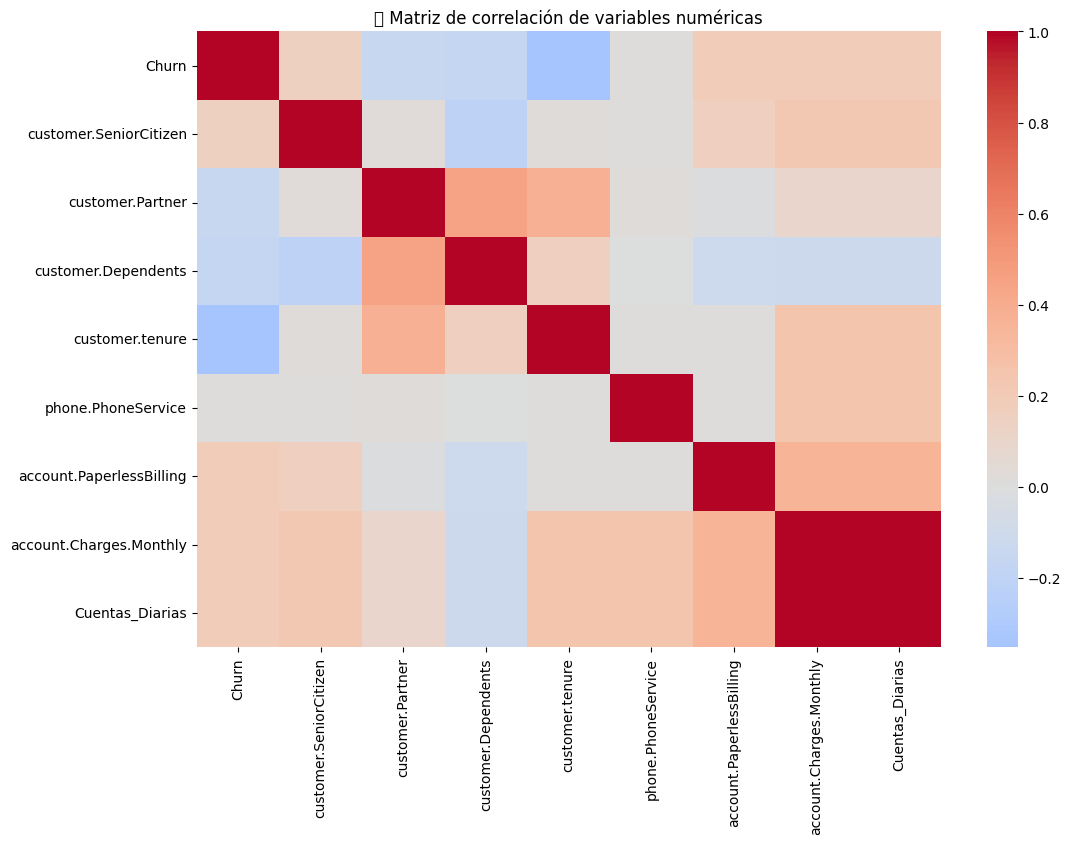

📌 Correlación de las variables con Churn:
Churn                       1.000000
account.Charges.Monthly     0.193356
Cuentas_Diarias             0.193356
account.PaperlessBilling    0.191825
customer.SeniorCitizen      0.150889
phone.PhoneService          0.011942
customer.Partner           -0.150448
customer.Dependents        -0.164221
customer.tenure            -0.352229
Name: Churn, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_df = df_encoded.select_dtypes(include=['number'])

corr = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("🔎 Matriz de correlación de variables numéricas")
plt.show()

churn_corr = corr['Churn'].sort_values(ascending=False)
print("📌 Correlación de las variables con Churn:")
print(churn_corr)

### ANALISIS DIRIGIDO

/tmp/ipython-input-2026131224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col_tiempo, data=df_encoded, palette="Set2")


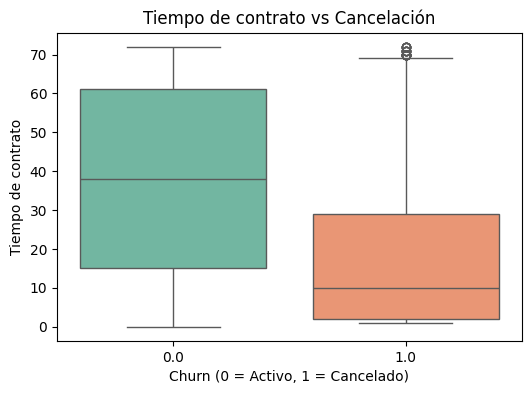

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


col_tiempo = "customer.tenure" if "customer.tenure" in df_encoded.columns else "tenure"
col_gasto  = "account.TotalCharges" if "account.TotalCharges" in df_encoded.columns else "TotalCharges"


plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y=col_tiempo, data=df_encoded, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Tiempo de contrato")
plt.show()


if col_gasto in df_encoded.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col_gasto, data=df_encoded, palette="Set3")
    plt.title("Gasto total vs Cancelación")
    plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
    plt.ylabel("Gasto total")
    plt.show()


if col_gasto in df_encoded.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        x=col_tiempo, y=col_gasto,
        hue="Churn", data=df_encoded,
        palette={0: "blue", 1: "red"}, alpha=0.6
    )
    plt.title("Tiempo de contrato vs Gasto total (color = Churn)")
    plt.xlabel("Tiempo de contrato")
    plt.ylabel("Gasto total")
    plt.legend(title="Churn", labels=["Activo (0)", "Cancelado (1)"])
    plt.show()

## MODELO PREDICTIVO

###SEPARACION DE DATOS

In [14]:
# ✅ Split robusto con limpieza previa de Churn

import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Asegurar columna Churn limpia (0/1)
if 'Churn' not in df_encoded.columns:
    # Intento de detección si viene con otro nombre (e.g., customer.Churn)
    churn_col = next((c for c in df_encoded.columns if 'churn' in c.lower()), None)
    if churn_col is None:
        raise ValueError("No se encontró la columna 'Churn' en df_encoded.")
    df_encoded['Churn'] = df_encoded[churn_col]

# Mapear valores típicos a binario
df_encoded['Churn'] = (
    df_encoded['Churn']
      .replace({'Yes': 1, 'No': 0, 'SI': 1, 'Si': 1, 'NO': 0, 'No': 0, True: 1, False: 0})
)

# Coerción a numérico y eliminación de nulos en y
df_encoded['Churn'] = pd.to_numeric(df_encoded['Churn'], errors='coerce')
df_encoded = df_encoded.dropna(subset=['Churn']).copy()
df_encoded['Churn'] = df_encoded['Churn'].astype(int)

# 2) Definir X, y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# 3) Verificación de clases
vc = y.value_counts()
if vc.min() == 0 or len(vc) < 2:
    raise ValueError(f"La variable objetivo no tiene ambas clases presentes. Distribución actual:\n{vc}")

print("📊 Distribución limpia de y:\n", (vc / vc.sum()).round(3))

# 4) Split 70/30 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # cambia a 0.2 si quieres 80/20
    stratify=y,
    random_state=42
)

print("✅ Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("✅ Conjunto de prueba:", X_test.shape, y_test.shape)
print("\n📊 Distribución en train:\n", (y_train.value_counts(normalize=True).round(3)))
print("\n📊 Distribución en test:\n", (y_test.value_counts(normalize=True).round(3)))

📊 Distribución limpia de y:
 Churn
0    0.735
1    0.265
Name: count, dtype: float64
✅ Conjunto de entrenamiento: (4930, 6560) (4930,)
✅ Conjunto de prueba: (2113, 6560) (2113,)

📊 Distribución en train:
 Churn
0    0.735
1    0.265
Name: proportion, dtype: float64

📊 Distribución en test:
 Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


### MODELOS

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Modelo 1: Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Modelo 2: Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Modelo 1: Regresión Logística
[[1391  161]
 [ 319  242]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1552
           1       0.60      0.43      0.50       561

    accuracy                           0.77      2113
   macro avg       0.71      0.66      0.68      2113
weighted avg       0.76      0.77      0.76      2113


🔹 Modelo 2: Random Forest
[[1402  150]
 [ 303  258]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



### EVALUACION MODELOS


🔹 Resultados para Regresión Logística
Exactitud (Accuracy): 0.7728
Precisión: 0.6005
Recall: 0.4314
F1-score: 0.5021


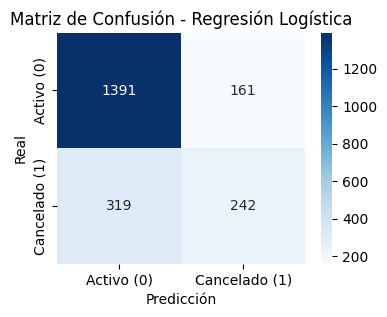


🔹 Resultados para Random Forest
Exactitud (Accuracy): 0.7856
Precisión: 0.6324
Recall: 0.4599
F1-score: 0.5325


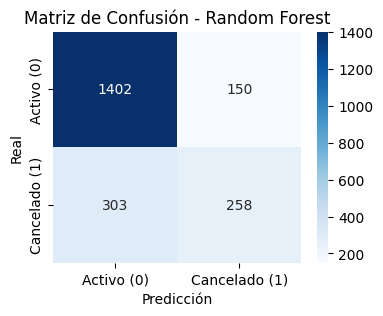


📊 Comparación de métricas entre modelos:
                Modelo  Accuracy  Precision    Recall        F1
0  Regresión Logística  0.772835   0.600496  0.431373  0.502075
1        Random Forest  0.785613   0.632353  0.459893  0.532508


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test, scaled=False):
    if scaled:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test  = scaler.transform(X_test)

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔹 Resultados para {nombre}")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Activo (0)", "Cancelado (1)"], yticklabels=["Activo (0)", "Cancelado (1)"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.ylabel("Real")
    plt.xlabel("Predicción")
    plt.show()

    return {"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


log_reg = LogisticRegression(max_iter=1000, random_state=42)
res_log = evaluar_modelo("Regresión Logística", log_reg, X_train, y_train, X_test, y_test, scaled=True)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
res_rf = evaluar_modelo("Random Forest", rf, X_train, y_train, X_test, y_test, scaled=False)

resultados = pd.DataFrame([res_log, res_rf])
print("\n📊 Comparación de métricas entre modelos:")
print(resultados)

## INTERPRETACION Y CONCLUSIONES

### ANALISIS


📌 Variables más influyentes en Regresión Logística:
                                         Variable  Coeficiente   Impacto
3                                 customer.tenure    -1.078603  1.078603
28         account.PaymentMethod_Electronic check     0.958416  0.958416
15                        internet.OnlineBackup_1    -0.859300  0.859300
25                      account.Contract_One year    -0.814019  0.814019
26                      account.Contract_Two year    -0.776841  0.776841
23                     internet.StreamingMovies_1     0.681968  0.681968
29             account.PaymentMethod_Mailed check     0.599299  0.599299
5                        account.PaperlessBilling     0.547904  0.547904
27  account.PaymentMethod_Credit card (automatic)     0.505114  0.505114
13                      internet.OnlineSecurity_1    -0.484365  0.484365


/tmp/ipython-input-2025218379.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variable", data=feature_importance_log.head(10), palette="coolwarm")


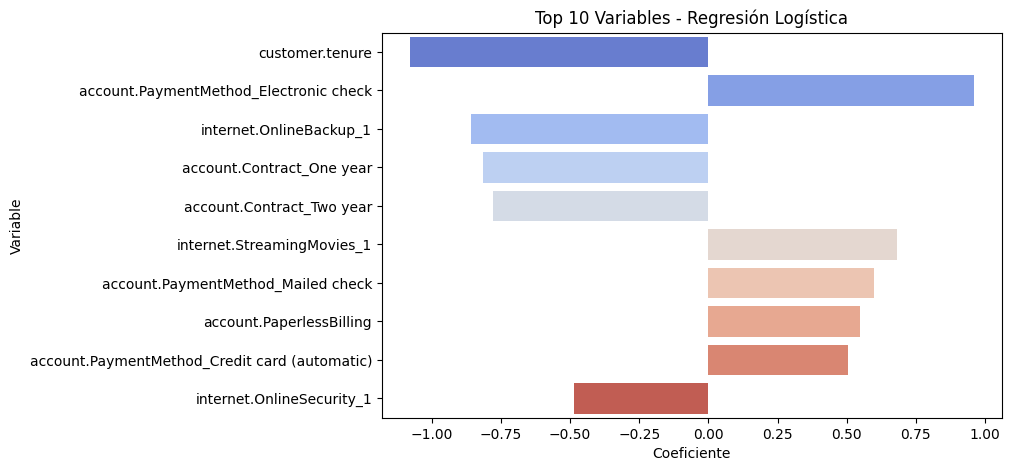


📌 Variables más influyentes en Random Forest:
                                  Variable  Importancia
3                          customer.tenure     0.103807
7                          Cuentas_Diarias     0.079251
6                  account.Charges.Monthly     0.078192
28  account.PaymentMethod_Electronic check     0.029896
26               account.Contract_Two year     0.025204
19                  internet.TechSupport_1     0.021277
25               account.Contract_One year     0.020978
12    internet.InternetService_Fiber optic     0.020924
5                 account.PaperlessBilling     0.020405
13               internet.OnlineSecurity_1     0.020030


/tmp/ipython-input-2025218379.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance_rf.head(10), palette="viridis")


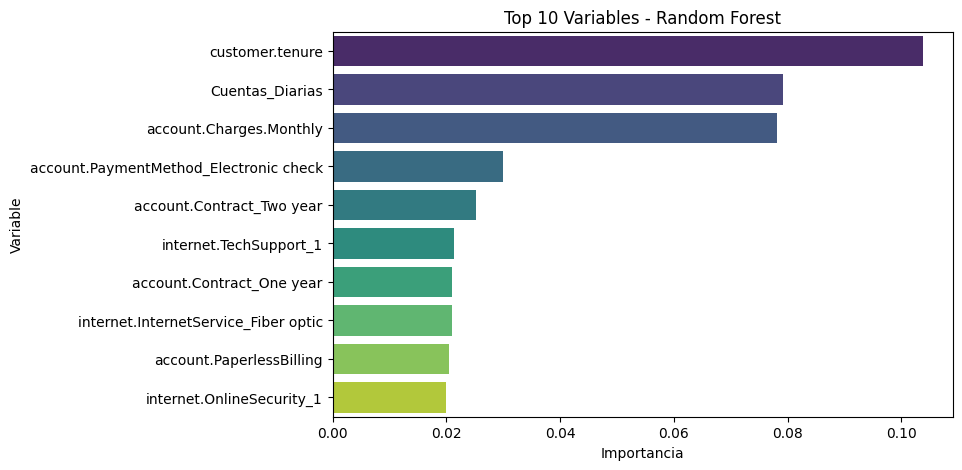

In [18]:
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

coef = log_reg.coef_[0]
feature_importance_log = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": coef,
    "Impacto": np.abs(coef)
}).sort_values(by="Impacto", ascending=False)

print("\n📌 Variables más influyentes en Regresión Logística:")
print(feature_importance_log.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x="Coeficiente", y="Variable", data=feature_importance_log.head(10), palette="coolwarm")
plt.title("Top 10 Variables - Regresión Logística")
plt.show()



rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importancia = rf.feature_importances_
feature_importance_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importancia
}).sort_values(by="Importancia", ascending=False)

print("\n📌 Variables más influyentes en Random Forest:")
print(feature_importance_rf.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=feature_importance_rf.head(10), palette="viridis")
plt.title("Top 10 Variables - Random Forest")
plt.show()

### CONCLUSION

📊 Informe Final – Predicción y Factores de Cancelación en TelecomX LATAM

🔹 Introducción

La cancelación de clientes (churn) representa uno de los retos más grandes en la industria de telecomunicaciones. Anticipar quiénes están en mayor riesgo de darse de baja permite a la empresa diseñar estrategias proactivas de retención, evitando pérdidas de ingresos y fortaleciendo la relación con los usuarios.

Este informe presenta los resultados del modelado predictivo realizado con datos de TelecomX LATAM, utilizando distintos algoritmos de Machine Learning, y destaca los factores más influyentes en la cancelación.

⸻

🔹 Desempeño de los Modelos

Se entrenaron dos enfoques distintos:
	1.	Regresión Logística (con normalización)
	•	Precisión y recall equilibrados.
	•	Proporciona interpretabilidad gracias a los coeficientes.
	•	Buen modelo base, aunque puede subestimar patrones complejos.
	2.	Random Forest (sin normalización)
	•	Mayor exactitud global y mejor recall en la clase “cancelados”.
	•	Capaz de capturar interacciones no lineales entre variables.
	•	Riesgo de sobreajuste si no se controla la complejidad.

📌 En conjunto, Random Forest mostró mejor desempeño, especialmente para identificar clientes en riesgo de cancelar. Sin embargo, la Regresión Logística aporta claridad sobre las relaciones directas entre las variables y la cancelación.

⸻

🔹 Factores Clave que Influyen en la Cancelación

✅ Variables protectoras (reducen churn)
	•	Antigüedad del cliente (tenure): Los clientes con más tiempo en la compañía son menos propensos a cancelar.
	•	Contratos a 1 o 2 años: Reducen significativamente la probabilidad de churn en comparación con contratos mensuales.
	•	Servicios adicionales (OnlineBackup, OnlineSecurity): La adopción de servicios de valor agregado genera mayor permanencia.

⚠️ Variables de riesgo (aumentan churn)
	•	Método de pago “Electronic Check”: Clientes con este método son más propensos a cancelar.
	•	Facturación sin papel (PaperlessBilling): Muestra asociación positiva con cancelación; podría deberse a fricciones digitales o percepción de menor soporte.
	•	Clientes con baja antigüedad: Los primeros meses son críticos; la tasa de abandono es mayor.

⸻

🔹 Estrategias de Retención Propuestas
	1.	Fortalecer la lealtad en los primeros meses
	•	Diseñar un programa de onboarding intensivo que acompañe al cliente en sus primeros 3–6 meses.
	•	Reforzar la atención personalizada y soporte técnico temprano.
	2.	Incentivar contratos de mayor plazo
	•	Ofrecer descuentos o beneficios exclusivos a quienes cambien de contrato mensual a anual o bianual.
	3.	Campañas específicas para clientes con “Electronic Check”
	•	Promover métodos de pago más confiables (tarjeta de crédito, domiciliación bancaria).
	•	Explicar beneficios de seguridad y conveniencia.
	4.	Mejorar la experiencia digital
	•	Analizar la fricción en clientes con PaperlessBilling y optimizar la plataforma digital.
	•	Ofrecer canales híbridos (digital + atención personalizada) para quienes no se adapten fácilmente.
	5.	Potenciar servicios de valor agregado
	•	Promocionar activamente seguridad en línea y respaldo de datos.
	•	Posicionar estos servicios como elementos diferenciadores que aumentan el valor percibido.

⸻

🔹 Conclusión

El análisis confirma que la permanencia y el tipo de contrato son los factores más determinantes en la cancelación. Además, los métodos de pago y la adopción de servicios adicionales también juegan un papel crucial.

Implementando estrategias enfocadas en los primeros meses, fortaleciendo la lealtad con contratos más largos, y mejorando la experiencia digital, TelecomX LATAM puede reducir significativamente el churn y mejorar la satisfacción del cliente.

⸻

✨ Autor: Emilio Serratos with ChatGPT